In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, classification_report
import xgboost as xgb

In [2]:
df=pd.read_csv('loan_train.csv')

In [5]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [6]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
# scaling the numerical columns
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
X_train1[numerical_cols] = scaler.fit_transform(X_train1[numerical_cols])
X_test1[numerical_cols] = scaler.transform(X_test1[numerical_cols])

Accuracy: 0.7560975609756098
Confusion Matrix:
 [[21 22]
 [ 8 72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.49      0.58        43
           1       0.77      0.90      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.75      0.76      0.74       123



C:\Users\hplap\.conda\New folder\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:30:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


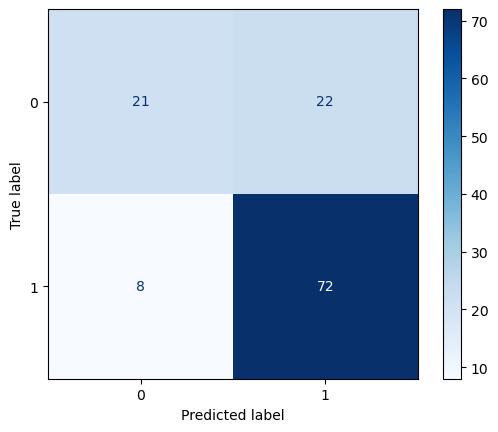

In [9]:
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic", 
    eval_metric="logloss",        
    use_label_encoder=False       
)

# training the model
xgb_model.fit(X_train1,y_train1)
# Make predictions
y_pred1= xgb_model.predict(X_test1)

# Evaluate the model
accuracy1 = accuracy_score(y_test1, y_pred1)
conf_matrix1 = confusion_matrix(y_test1, y_pred1)
classification_rep1 = classification_report(y_test1, y_pred1)

print("Accuracy:", accuracy1)
print("Confusion Matrix:\n", conf_matrix1)
print("Classification Report:\n", classification_rep1)

# Display the confusion matrix with custom labels
disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1)
disp1.plot(cmap="Blues")